In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import root_mean_squared_error, r2_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamsingh163248/housing-price-prediction")

print("Path to dataset files:", path)

housing_dataset = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

Using Colab cache for faster access to the 'housing-price-prediction' dataset.
Path to dataset files: /kaggle/input/housing-price-prediction


In [ ]:
housing_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing_dataset.shape

(545, 13)

In [ ]:
housing_dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
housing_dataset.duplicated().sum()

np.int64(0)

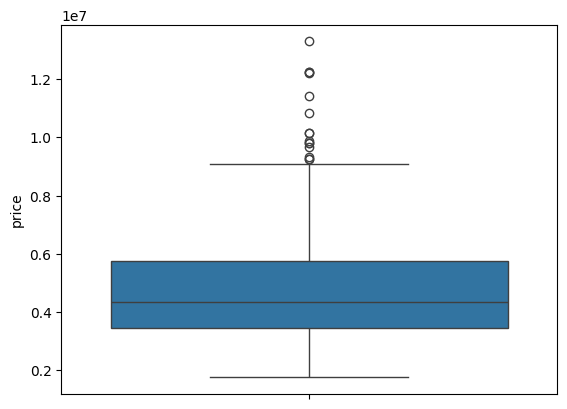

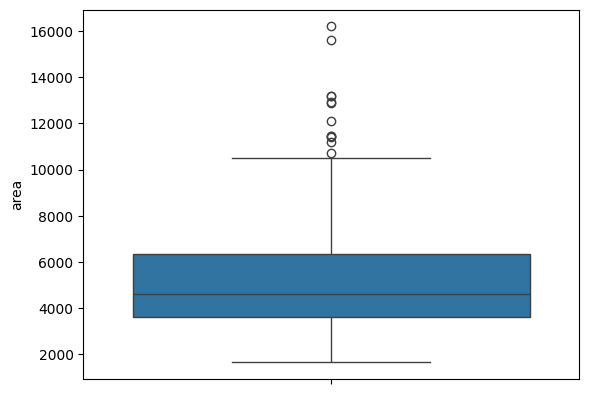

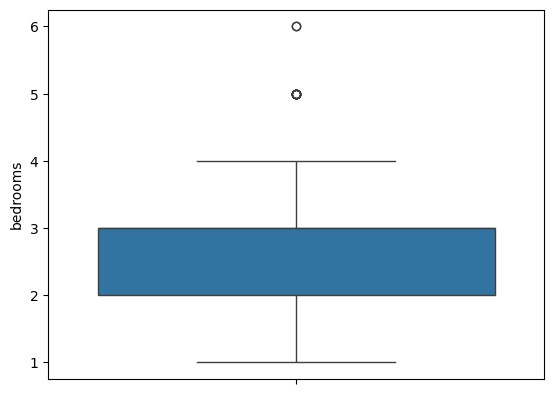

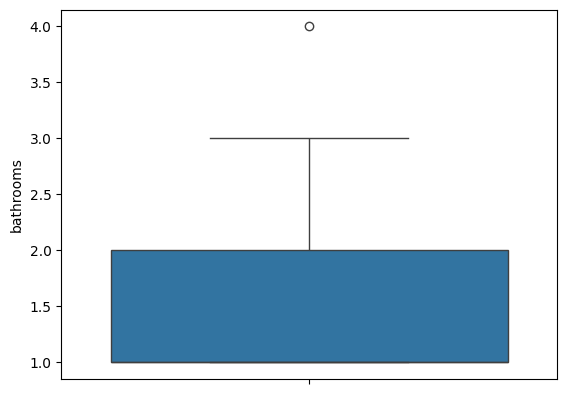

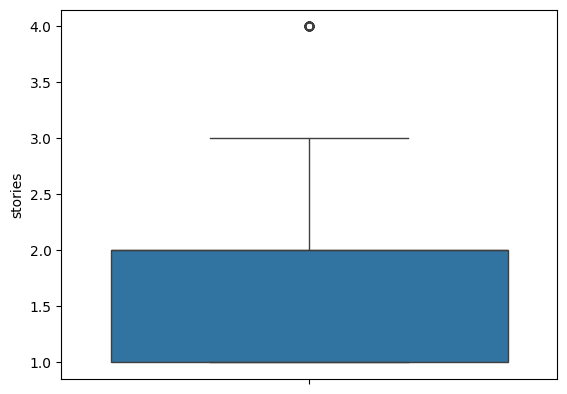

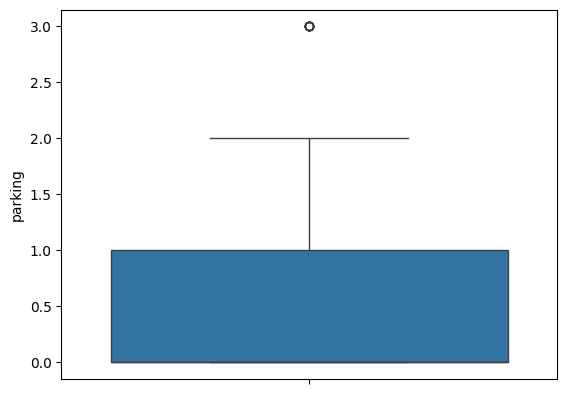

In [ ]:
for col in housing_dataset.columns:
    if housing_dataset[col].dtype == 'int64':
        sns.boxplot(housing_dataset[col])
        plt.show()

##Outlier Analysis:
Boxplots were used to check for outliers across all features.
Discrete variables such as bedrooms, bathrooms, and stories showed only a few
mild outliers. These values are realistic and occur very rarely, so they were
retained as they do not significantly affect the model.
Area and price showed right-skewed distributions with some high-end values.
These represent genuinely large and expensive houses rather than data errors.
Removing them could bias the model and reduce its ability to learn real market behavior.

In [ ]:
code = {}  # store mappings for all columns

for col in housing_dataset.columns:
    if housing_dataset[col].dtype == 'object':
        le = LabelEncoder()
        housing_dataset[col] = le.fit_transform(housing_dataset[col])
        code[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [ ]:
for col,map in code.items():
    print(f"{col}:")
    for key,value in map.items():
        print(f"{key}:{value}")
    print()

mainroad:
no:0
yes:1

guestroom:
no:0
yes:1

basement:
no:0
yes:1

hotwaterheating:
no:0
yes:1

airconditioning:
no:0
yes:1

prefarea:
no:0
yes:1

furnishingstatus:
furnished:0
semi-furnished:1
unfurnished:2



##Why Label Encoding:
computer does not understand string values during prediction so label encoder converts the string values into numeric values

In [ ]:
y = housing_dataset['price']
X = housing_dataset.drop('price',axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([6608689.65752409, 2629603.54758492, 5031409.49510286,
       4203277.68828181, 6662510.21550395, 4700646.3451    ,
       4128528.2055529 , 3585001.88576595, 9326641.69951922,
       4588733.43649318, 2175045.63029803, 4289191.36078826,
       4161866.59790619, 3969695.75898547, 6369386.86501143,
       6645043.51132235, 2626779.889882  , 3308327.48846367,
       3673159.7255161 , 5804504.88901065, 2523434.01795481,
       7195341.88400579, 2169915.62892863, 4793406.31990006,
       6999269.15433504, 5237520.23449471, 4248290.62415124,
       5144285.17662518, 2627890.76165979, 4465785.58499914,
       3521879.38171035, 3003076.80795404, 2085205.89784077,
       3627099.85182092, 5068022.80355439, 2544860.18927078,
       4257846.08491262, 5486762.05745695, 5145471.03952765,
       2863583.57335971, 2499715.29325021, 6099662.65676628,
       6634109.30870588, 5683212.68858797, 2727290.67639997,
       6123724.16689888, 4837706.15662573, 3845074.04302872,
       4002158.14796272,

In [ ]:
y_test

,price
54,7350000
525,2345000
84,6510000
374,3640000
270,4340000
...,...
17,8960000
342,3850000
437,3290000
61,7070000


In [ ]:
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
print(f"RMSE:{rmse}\nr2_score:{r2}")

RMSE:965259.3310426433
r2_score:0.6765722470370061


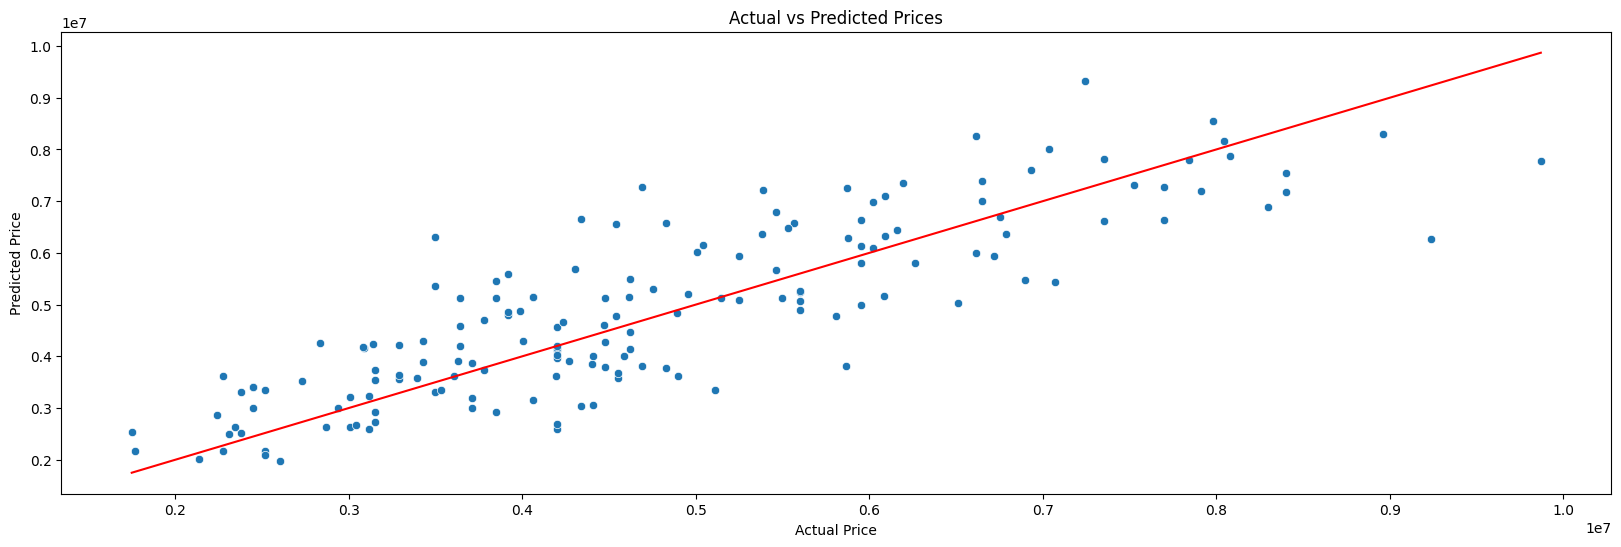

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=y_test, y=y_pred)

sns.lineplot(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    color = 'red'
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


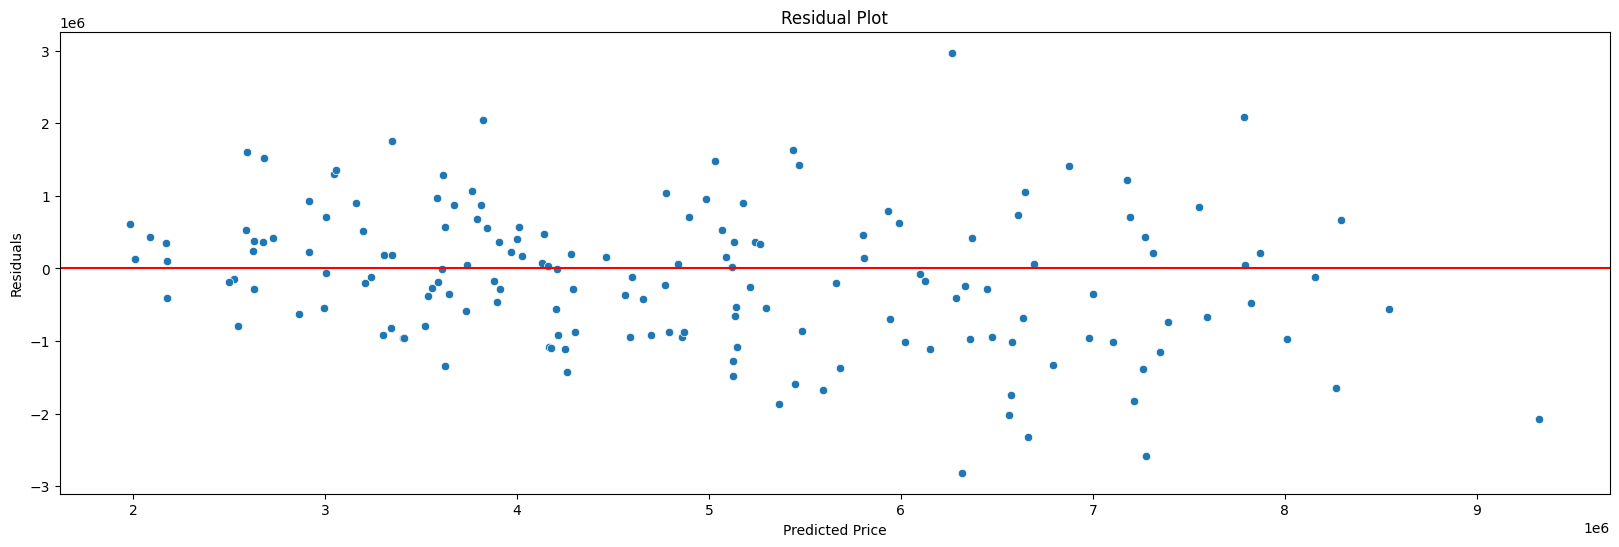

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(20,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0,color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


##VISUALISATION:
from the above plot we can see that this is a decent model as the line is almost passsing through the middle of the scatter plots
